In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
carss = pd.read_csv('carss.csv')
cars = carss.sort_values('date')

cars.head()
print(cars)

     product_id product_name  import_amount  export_amount        date
0          8703         cars           2302             66  2007-01-01
1          8703         cars           2311             97  2007-02-01
2          8703         cars           3167            142  2007-03-01
3          8703         cars           2959            113  2007-04-01
4          8703         cars           3258            154  2007-05-01
..          ...          ...            ...            ...         ...
199        8703         cars          10506            872  2023-08-01
200        8703         cars           9059           1718  2023-09-01
201        8703         cars           7723           1950  2023-10-01
202        8703         cars           6050            865  2023-11-01
203        8703         cars           8455            518  2023-12-01

[204 rows x 5 columns]


In [4]:
# Adding new variables to the dataset based on the identified events
cars['financial_crisis'] = 0
cars['taxation_policy'] = 0
cars['war_pandemic'] = 0
cars['market_adaptation'] = 0

# Marking the respective years with a value of 1 for each event
cars.loc['2008':'2009', 'financial_crisis'] = 1
cars.loc['2019', 'taxation_policy'] = 1
cars.loc['2020', 'war_pandemic'] = 1
cars.loc['2021', 'market_adaptation'] = 1
cars[['financial_crisis', 'taxation_policy', 'war_pandemic', 'market_adaptation']] = cars[['financial_crisis', 'taxation_policy', 'war_pandemic', 'market_adaptation']].fillna(0)
# Displaying the updated dataset
print(cars)

      product_id product_name  import_amount  export_amount        date  \
0         8703.0         cars         2302.0           66.0  2007-01-01   
1         8703.0         cars         2311.0           97.0  2007-02-01   
2         8703.0         cars         3167.0          142.0  2007-03-01   
3         8703.0         cars         2959.0          113.0  2007-04-01   
4         8703.0         cars         3258.0          154.0  2007-05-01   
...          ...          ...            ...            ...         ...   
202       8703.0         cars         6050.0          865.0  2023-11-01   
203       8703.0         cars         8455.0          518.0  2023-12-01   
2019         NaN          NaN            NaN            NaN         NaN   
2020         NaN          NaN            NaN            NaN         NaN   
2021         NaN          NaN            NaN            NaN         NaN   

      financial_crisis  taxation_policy  war_pandemic  market_adaptation  
0                  0.0  

In [5]:
cars[['financial_crisis', 'taxation_policy', 'war_pandemic', 'market_adaptation']] = cars[['financial_crisis', 'taxation_policy', 'war_pandemic', 'market_adaptation']].fillna(0)
cars.date = pd.to_datetime(cars['date']) #
del cars["product_id"]
del cars["product_name"]
del cars["export_amount"]
cars.head()
print(cars)

      import_amount       date  financial_crisis  taxation_policy  \
0            2302.0 2007-01-01               0.0              0.0   
1            2311.0 2007-02-01               0.0              0.0   
2            3167.0 2007-03-01               0.0              0.0   
3            2959.0 2007-04-01               0.0              0.0   
4            3258.0 2007-05-01               0.0              0.0   
...             ...        ...               ...              ...   
202          6050.0 2023-11-01               0.0              0.0   
203          8455.0 2023-12-01               0.0              0.0   
2019            NaN        NaT               0.0              1.0   
2020            NaN        NaT               0.0              0.0   
2021            NaN        NaT               0.0              0.0   

      war_pandemic  market_adaptation  
0              0.0                0.0  
1              0.0                0.0  
2              0.0                0.0  
3          

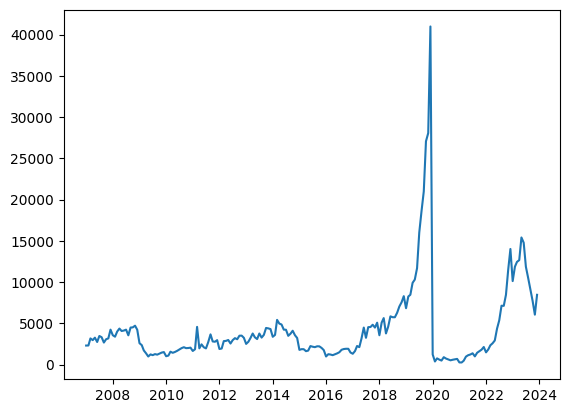

In [6]:
plt.plot(cars.date,cars.import_amount)         # plot series
plt.show();

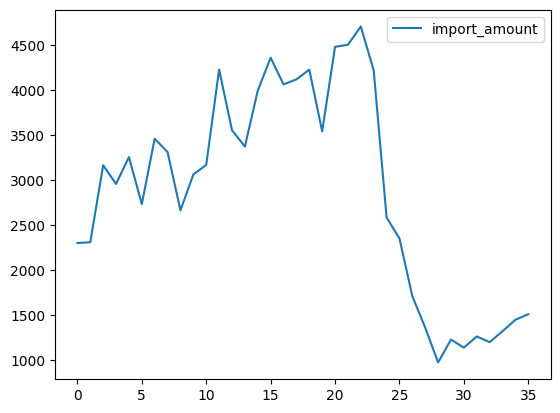

In [7]:
cars.iloc[0:36].plot(y= "import_amount")
plt.show();

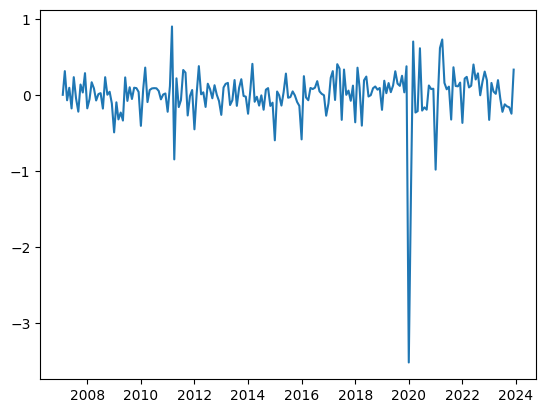

In [8]:
# Adjusting to perform operations on 'import_amount' instead of 'value'
cars['import_amount'] = np.log(cars['import_amount'])  # log of import_amount
cars['import_amount_d1'] = cars['import_amount'].diff()  # Take first difference of import_amount
carsd1_import_amount = cars.drop(cars.index[0])  # Remove first observation for import_amount

# Plotting the series for import_amount
plt.plot(carsd1_import_amount['date'], carsd1_import_amount['import_amount_d1'])
plt.show();


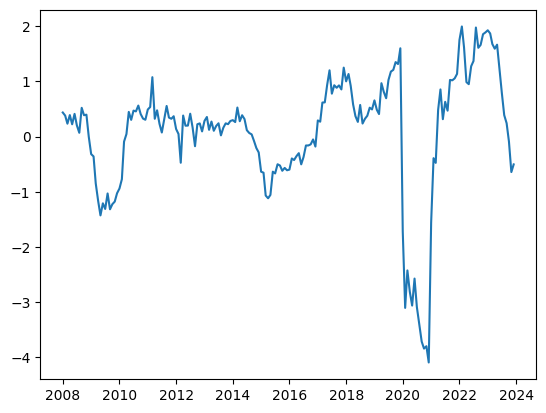

In [9]:
# Applying seasonal differencing with a period of 12 to 'import_amount'
cars['import_amount_d12'] = cars['import_amount'].diff(12)  # Seasonal differencing with periods = 12
carsd12_import_amount = cars.drop(cars.index[0:12])  # Remove first 12 observations for seasonal differencing

# Plotting the series for import_amount after seasonal differencing
plt.plot(carsd12_import_amount['date'], carsd12_import_amount['import_amount_d12'])
plt.show();


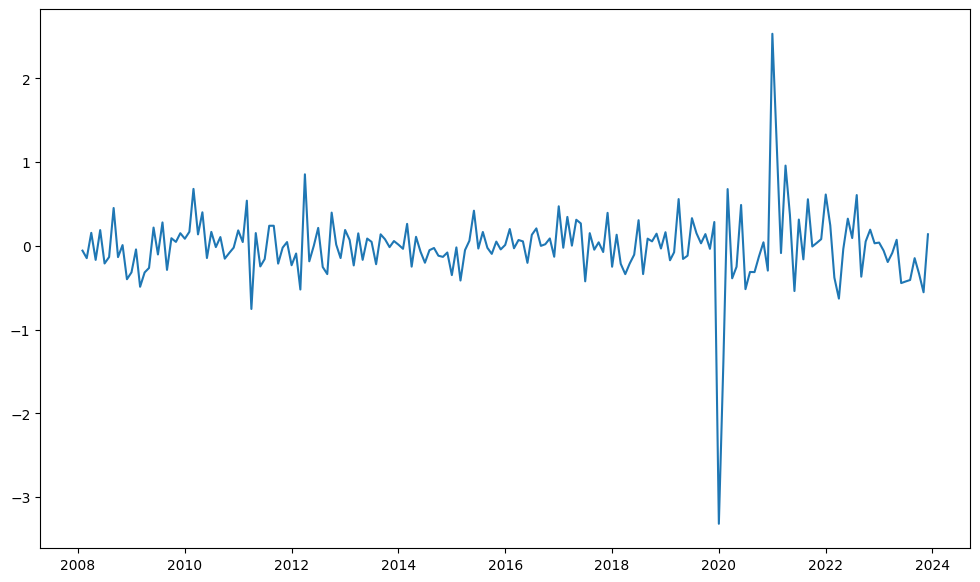

In [10]:
cars['import_amount_d12d1'] = cars['import_amount_d1'].diff(12)  # Correct application

#  plot
plt.figure(figsize=(12, 7))

if 'import_amount_d12d1' in cars and not cars['import_amount_d12d1'].dropna().empty:
    plt.plot(cars['date'], cars['import_amount_d12d1'])
else:
    plt.text(0.5, 0.5, 'Not enough data for seasonal differencing with period 12',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes)
plt.show();


In [11]:
# Applying transformation to the 'import_amount' column in the 'cars' dataset
cars['diff_o1'] = np.append([np.nan] * 1, np.diff(cars['import_amount'], n=1))
cars['diff_o2'] = np.append([np.nan] * 2, np.diff(cars['import_amount'], n=2))
cars['diff_o3'] = np.append([np.nan] * 3, np.diff(cars['import_amount'], n=3))

# Displaying the first few rows of the modified 'cars' dataset
cars.head()


,import_amount,date,financial_crisis,taxation_policy,war_pandemic,market_adaptation,import_amount_d1,import_amount_d12,import_amount_d12d1,diff_o1,diff_o2,diff_o3
0,7.741534,2007-01-01,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,7.745436,2007-02-01,0.0,0.0,0.0,0.0,0.003902,NaN,NaN,0.003902,NaN,NaN
2,8.060540,2007-03-01,0.0,0.0,0.0,0.0,0.315104,NaN,NaN,0.315104,0.311202,NaN
3,7.992607,2007-04-01,0.0,0.0,0.0,0.0,-0.067933,NaN,NaN,-0.067933,-0.383038,-0.694240
4,8.088869,2007-05-01,0.0,0.0,0.0,0.0,0.096262,NaN,NaN,0.096262,0.164196,0.547233


In [12]:
cars.tail()

,import_amount,date,financial_crisis,taxation_policy,war_pandemic,market_adaptation,import_amount_d1,import_amount_d12,import_amount_d12d1,diff_o1,diff_o2,diff_o3
202,8.707814,2023-11-01,0.0,0.0,0.0,0.0,-0.244145,-0.644026,-0.553471,-0.244145,-0.084589,-0.073221
203,9.042513,2023-12-01,0.0,0.0,0.0,0.0,0.334700,-0.505156,0.138870,0.334700,0.578844,0.663433
2019,NaN,NaT,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaT,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2021,NaN,NaT,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


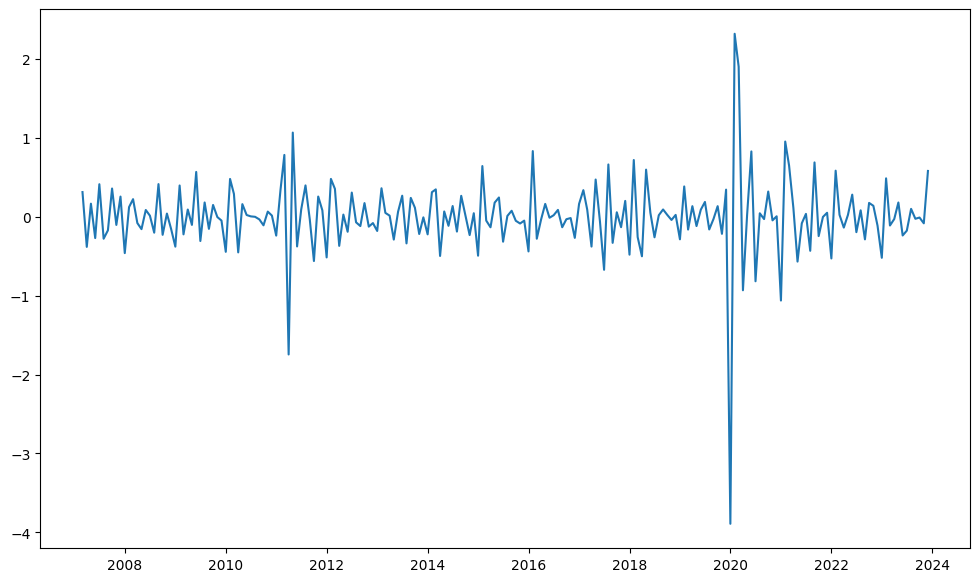

In [13]:
# Removing the first 2 observations for the 'cars' dataset
carsd_o2 = cars.drop(cars.index[0:2])

# Plotting the 'diff_o2' series after removing the first 2 observations
plt.figure(figsize=(12, 7))
plt.plot(carsd_o2['date'], carsd_o2['diff_o2'])
plt.show();


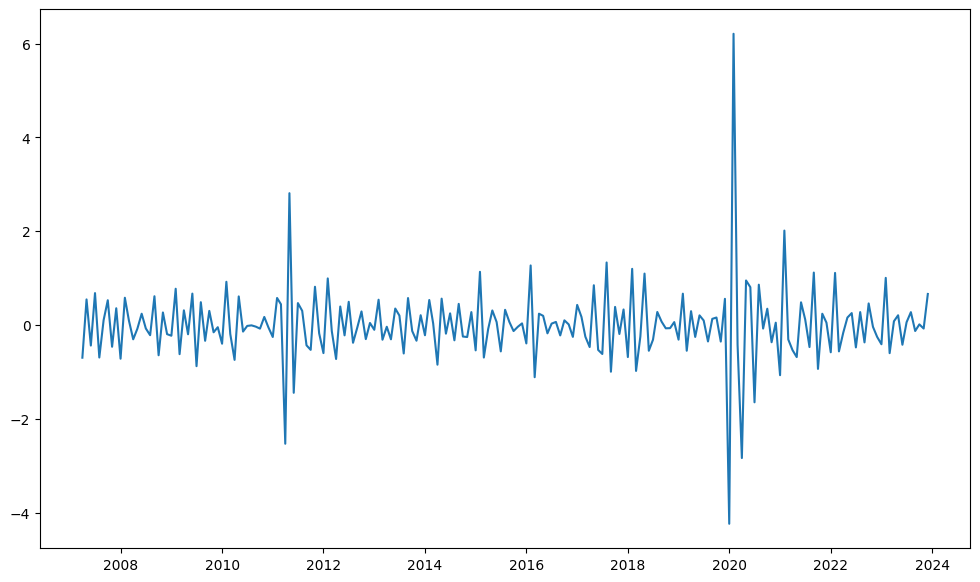

In [14]:
# Removing the first 3 observations for the 'cars' dataset
carsd_o3 = cars.drop(cars.index[0:3])

# Plotting the 'diff_o3' series after removing the first 3 observations
plt.figure(figsize=(12, 7))
plt.plot(carsd_o3['date'], carsd_o3['diff_o3'])
plt.show();


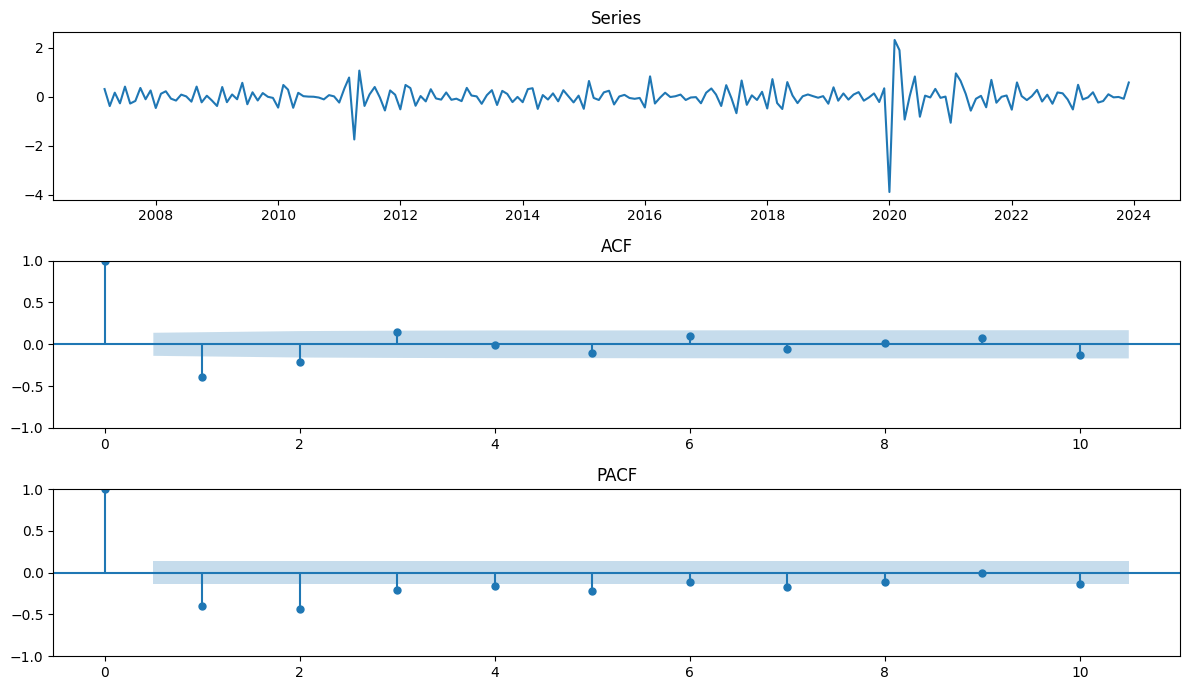

In [15]:
# Plotting the series, ACF, and PACF for the second differenced 'import_amount' after removing first 2 observations
plt.figure(figsize=(12, 7))
plt.subplot(311)  # Positioning the series plot
plt.plot(carsd_o2['date'], carsd_o2['diff_o2'])
plt.title('Series')

plt.subplot(312)  # Positioning the ACF plot
plot_acf(carsd_o2['diff_o2'].dropna(), lags=10, ax=plt.gca())
plt.title('ACF')

plt.subplot(313)  # Positioning the PACF plot
plot_pacf(carsd_o2['diff_o2'].dropna(), lags=10, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show();


In [16]:
# Fitting an ARIMA model to the second differenced 'import_amount' data
mod = ARIMA(carsd_o2['diff_o2'].dropna(), order=(1, 2, 0))  # Using dropna() to ensure no NaNs interfere
result = mod.fit()

# Printing the summary of the fitted model
result_summary = result.summary()
result_summary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                diff_o2   No. Observations:                  202
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -301.080
Date:                Wed, 08 May 2024   AIC                            606.160
Time:                        22:23:03   BIC                            612.757
Sample:                    01-01-1970   HQIC                           608.830
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6588      0.020    -33.270      0.000      -0.698      -0.620
sigma2         1.1854      0.038     30.971      0.000       1.110       1.260
===================================================================================
Ljung-Box (L1) (Q):                  35.10   Jarque-Bera (JB):              2461.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.54   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

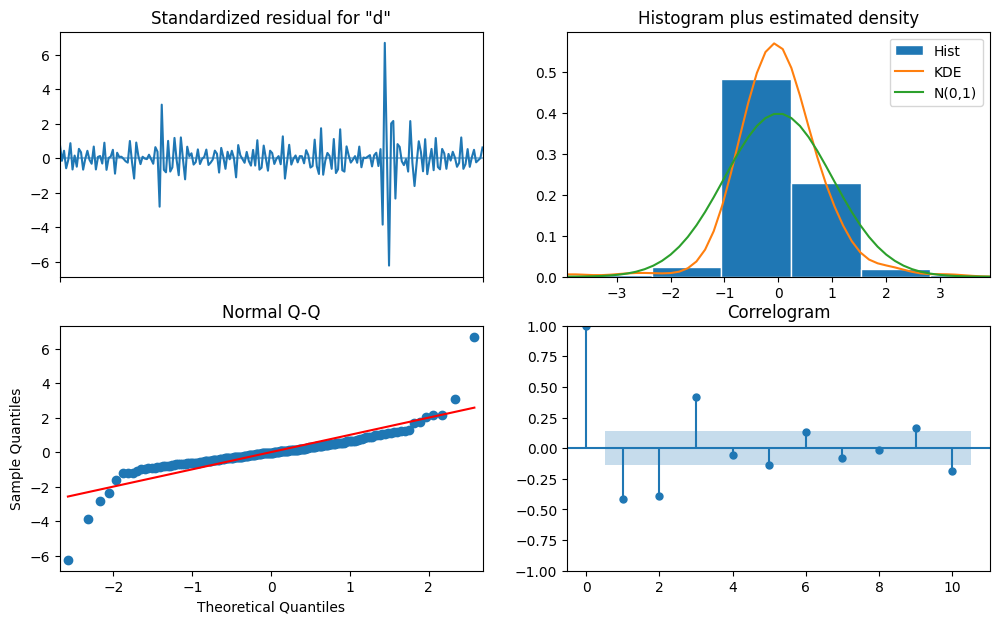

In [17]:
result.plot_diagnostics(figsize=(12,7))
plt.show()

In [18]:
sm.stats.acorr_ljungbox(result.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,125.616459,3.653265e-22


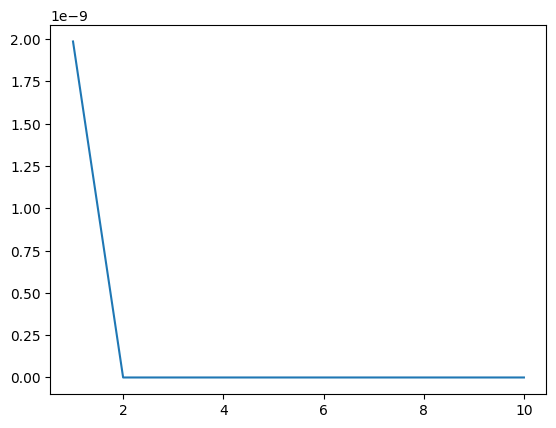

In [19]:
Lj_Box= sm.stats.acorr_ljungbox(result.resid, lags=10,return_df=True)
plt.plot(Lj_Box.index,Lj_Box.lb_pvalue)

In [20]:
cleaned_cars = cars.dropna(subset=['import_amount'])
stepwise_fit = auto_arima(cleaned_cars['import_amount'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=154.493, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=517.534, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=153.804, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=332.961, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1429.753, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=154.068, Time=0.89 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=153.497, Time=1.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=153.166, Time=1.60 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=154.210, Time=1.60 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=152.921, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=253.078, Time=0.36 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=153.969, Time=0.55 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=222.017, Time=0.49 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=155.796, Time=1.61 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=165.

In [21]:
mod = ARIMA(cars['import_amount'], order=(1,0,2))
result = mod.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          import_amount   No. Observations:                  207
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -71.461
Date:                Wed, 08 May 2024   AIC                            152.921
Time:                        22:23:16   BIC                            169.585
Sample:                             0   HQIC                           159.660
                                - 207                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0062      0.397     20.185      0.000       7.229       8.784
ar.L1          0.9140      0.035     25.916      0.000       0.845       0.983
ma.L1          0.1154      0.049      2.338      0.0

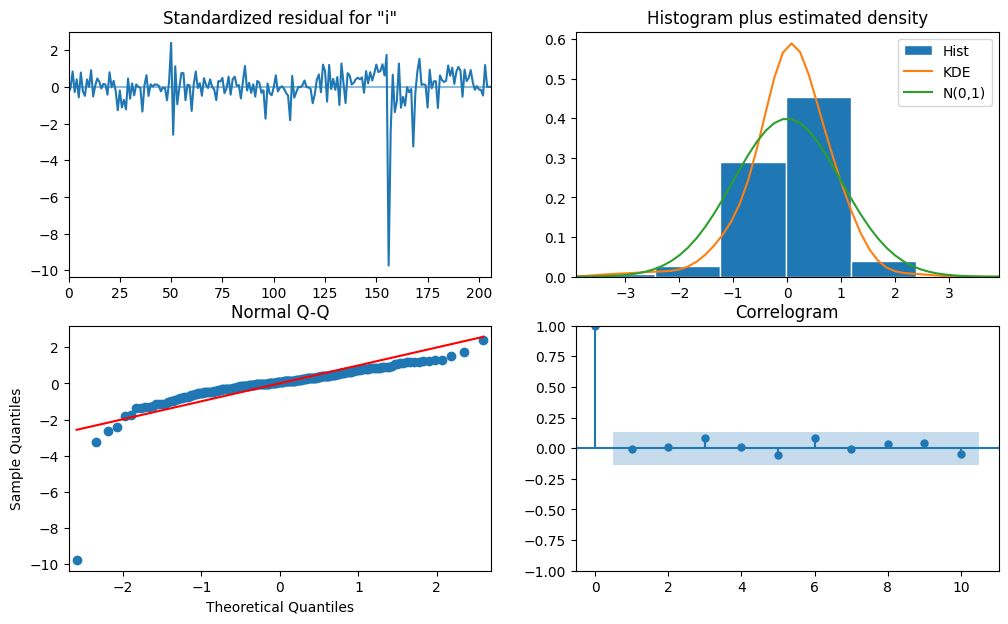

In [22]:
result.plot_diagnostics(figsize=(12,7))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                      import_amount   No. Observations:                  207
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                 -59.222
Date:                            Wed, 08 May 2024   AIC                            132.444
Time:                                    22:23:23   BIC                            154.794
Sample:                                         0   HQIC                           141.506
                                            - 207                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9159      0.043     21.282      0.000       0.832       1.000
ma.L1          0.1588      0.048   

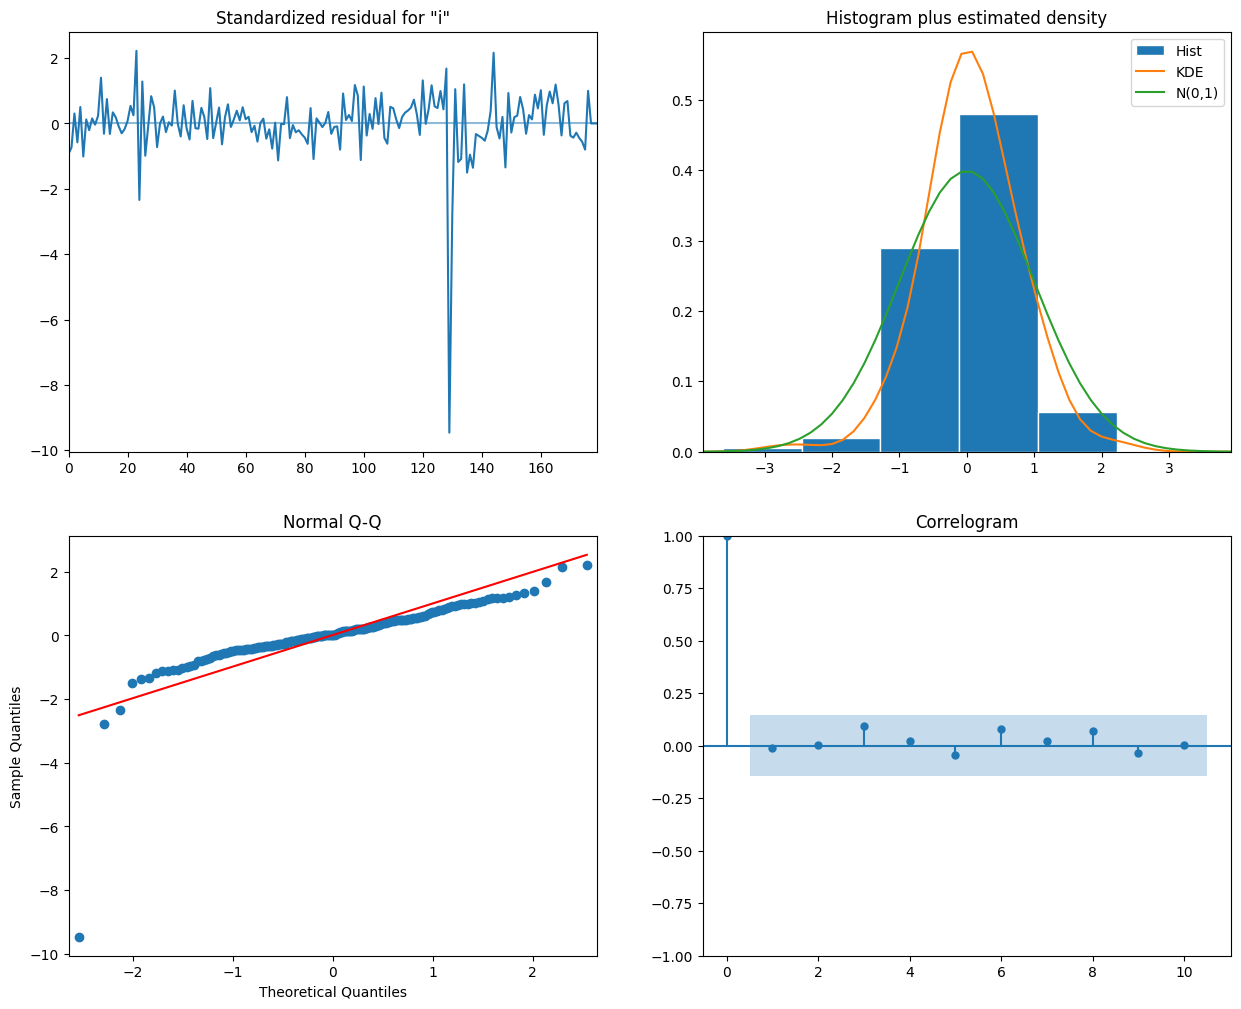

In [23]:
model = SARIMAX(cars['import_amount'],
                order=(1, 0, 2),              # ARIMA(p, d, q)
                seasonal_order=(1, 0, 2, 12), # Seasonal (P, D, Q, s)
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
results = model.fit()

# Print the summary
print(results.summary())

# Optional: Plot diagnostics to check for any unusual behavior.
results.plot_diagnostics(figsize=(15, 12))
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/

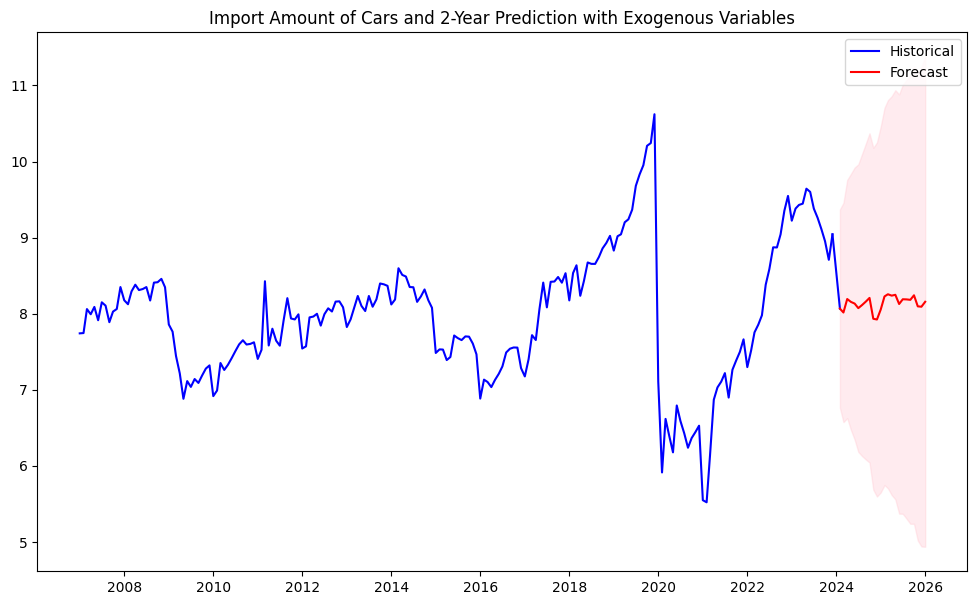

In [24]:
# Define SARIMAX parameters
order = (1, 0, 2)
seasonal_order = (1, 0, 2, 24)

# Extract the exogenous variables (replace with actual column names)
exog_variables = cars[['financial_crisis', 'taxation_policy', 'war_pandemic', 'market_adaptation']]

# Fit the model to historical data
model = SARIMAX(
    cars['import_amount'],
    exog=exog_variables,
    order=order,
    seasonal_order=seasonal_order
)
result = model.fit(maxiter=1500, method='nm', disp=False)

# Find the last available date in the dataset
last_date = cars['date'].max()

# Forecast 2 years ahead assuming monthly data
forecast_steps = 24
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Prepare forecast exogenous variables (fill or adjust these values)
exog_forecast = pd.DataFrame(
    [[0, 0, 0, 0]] * forecast_steps,
    columns=['financial_crisis', 'taxation_policy', 'war_pandemic', 'market_adaptation']
)
# Modify `exog_forecast` according to future projections

# Perform forecasting
forecast = result.get_forecast(steps=forecast_steps, exog=exog_forecast)

# Get predicted mean values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a DataFrame for the forecast data
forecast_df = pd.DataFrame({
    'date': forecast_index,
    'import_amount': forecast_mean,
    'lower_ci': forecast_ci.iloc[:, 0],
    'upper_ci': forecast_ci.iloc[:, 1]
})

# Extract the last point from historical data
last_historical_date = cars['date'].max()
last_historical_value = cars.loc[cars['date'] == last_historical_date, 'import_amount'].values[0]

# Plot historical data
plt.figure(figsize=(12, 7))
plt.plot(cars['date'], cars['import_amount'], label='Historical', color='blue')

# Connect the last historical point to the first forecast point
plt.plot([last_historical_date, forecast_df['date'].iloc[0]], [last_historical_value, forecast_df['import_amount'].iloc[0]], color='blue')

# Plot forecast data
plt.plot(forecast_df['date'], forecast_df['import_amount'], label='Forecast', color='red')
plt.fill_between(forecast_df['date'], forecast_df['lower_ci'], forecast_df['upper_ci'], color='pink', alpha=0.3)

# Final touches on the graph
plt.title("Import Amount of Cars and 2-Year Prediction with Exogenous Variables")
plt.legend()
plt.show()




# Battery

In [25]:
bateries = pd.read_csv('batteries.csv')
batteries= bateries.sort_values(by='date')
batteries.head()

,export_in_tonn,export_in_1000_,import_in_tonn,import_in_1000_,product_id,product_name,export_percent,import_percent,date
0,1.677,1.96249,135.90394,558.609950,8507,batteries,97%,13%,2007-01-01
1,0.000,0.00000,107.03717,165.555570,8507,batteries,0%,6%,2007-02-01
2,0.000,0.00000,2.38241,14.643305,8507,batteries,0%,0%,2007-03-01
3,0.000,0.00000,147.44648,330.070624,8507,batteries,0%,10%,2007-04-01
4,0.000,0.00000,77.63390,176.632880,8507,batteries,0%,5.5%,2007-05-01


In [26]:
batteries['date'] = pd.to_datetime(batteries['date'], errors='coerce')

# Creating individual variables for each factor at corresponding dates
batteries['impact_financial_crisis'] = 0
batteries['impact_preemptive_imports'] = 0
batteries['impact_war_pandemic'] = 0
batteries['impact_recovery'] = 0
batteries['impact_domestic_production'] = 0

# Setting values for each variable based on specific years
batteries.loc[(batteries['date'].dt.year == 2008) | (batteries['date'].dt.year == 2009), 'impact_financial_crisis'] = -1
batteries.loc[batteries['date'].dt.year == 2019, 'impact_preemptive_imports'] = 1
batteries.loc[batteries['date'].dt.year == 2020, 'impact_war_pandemic'] = -1
batteries.loc[batteries['date'].dt.year == 2021, 'impact_recovery'] = 1
batteries.loc[batteries['date'].dt.year >= 2011, 'impact_domestic_production'] = -0.13

# Show the updated dataset with the new columns
batteries.tail(20)  # Displaying the last 20 entries to see recent years with the new variables added


,export_in_tonn,export_in_1000_,import_in_tonn,import_in_1000_,product_id,product_name,export_percent,import_percent,date,impact_financial_crisis,impact_preemptive_imports,impact_war_pandemic,impact_recovery,impact_domestic_production
184,0.074770,11.87761,130.291585,732.21015,8507,batteries,0.5%,4%,2022-05-01,0,0,0,0,-0.13
185,0.003192,2.04981,304.592780,1040.90852,8507,batteries,0%,7%,2022-06-01,0,0,0,0,-0.13
186,5.258921,84.14422,228.607008,924.62514,8507,batteries,3.5%,6%,2022-07-01,0,0,0,0,-0.13
187,42.114400,218.21288,346.136566,1315.74165,8507,batteries,16.5%,8%,2022-08-01,0,0,0,0,-0.13
188,43.745688,265.17649,535.991928,2095.99379,8507,batteries,18.5%,13%,2022-09-01,0,0,0,0,-0.13
189,47.689307,436.18948,617.861276,2162.56755,8507,batteries,24%,14.5%,2022-10-01,0,0,0,0,-0.13
190,48.055227,366.60411,538.392806,2081.75263,8507,batteries,22.5%,13%,2022-11-01,0,0,0,0,-0.13
191,24.943396,264.57807,527.629137,1959.19887,8507,batteries,14%,12.5%,2022-12-01,0,0,0,0,-0.13
192,51.328619,367.30458,448.277265,1767.68100,8507,batteries,24.5%,9%,2023-01-01,0,0,0,0,-0.13
193,7.967117,131.17085,251.509294,1089.42979,8507,batteries,6.5%,5.5%,2023-02-01,0,0,0,0,-0.13


In [27]:
del batteries["export_in_tonn"]
del batteries["export_in_1000_"]
del batteries["import_in_1000_"]
del batteries["product_id"]
del batteries["product_name"]
del batteries["export_percent"]
del batteries["import_percent"]
batteries.head()

,import_in_tonn,date,impact_financial_crisis,impact_preemptive_imports,impact_war_pandemic,impact_recovery,impact_domestic_production
0,135.90394,2007-01-01,0,0,0,0,0.0
1,107.03717,2007-02-01,0,0,0,0,0.0
2,2.38241,2007-03-01,0,0,0,0,0.0
3,147.44648,2007-04-01,0,0,0,0,0.0
4,77.63390,2007-05-01,0,0,0,0,0.0


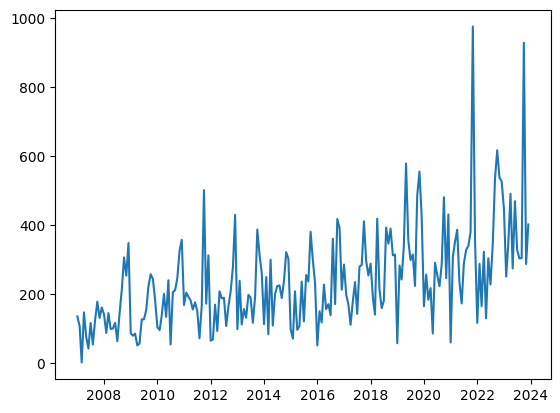

In [28]:
plt.plot(batteries.date,batteries.import_in_tonn)         # plot series
plt.show();

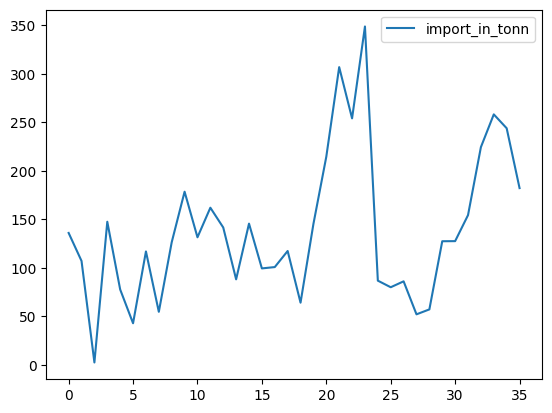

In [29]:
batteries.iloc[0:36].plot(y= "import_in_tonn")
plt.show();

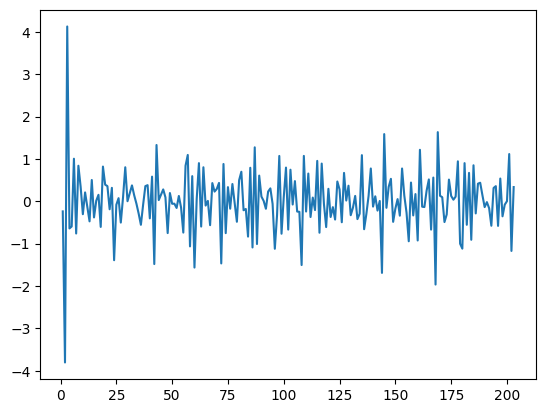

In [30]:
batteries['import_in_tonn'] = np.log(batteries['import_in_tonn'])           # log of values
batteries['import_in_tonnd1'] = batteries['import_in_tonn'].diff()            # Take first difference
batteriesd1 = batteries.drop(batteries.index[0])               # Remove first observation
plt.plot(batteriesd1.index,batteriesd1.import_in_tonnd1)         # plot series
plt.show();

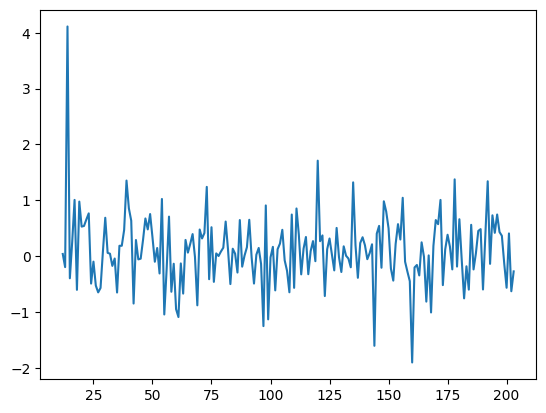

In [31]:
batteries['import_in_tonnd12'] = batteries['import_in_tonn'].diff(12)            # Seasonal differencing periods = 12
batteriesd12 = batteries.drop(batteries.index[0:12])          # Remove first observations
#Passengersd12.head(20)
plt.plot(batteriesd12.index,batteriesd12.import_in_tonnd12)             # plot series
plt.show();

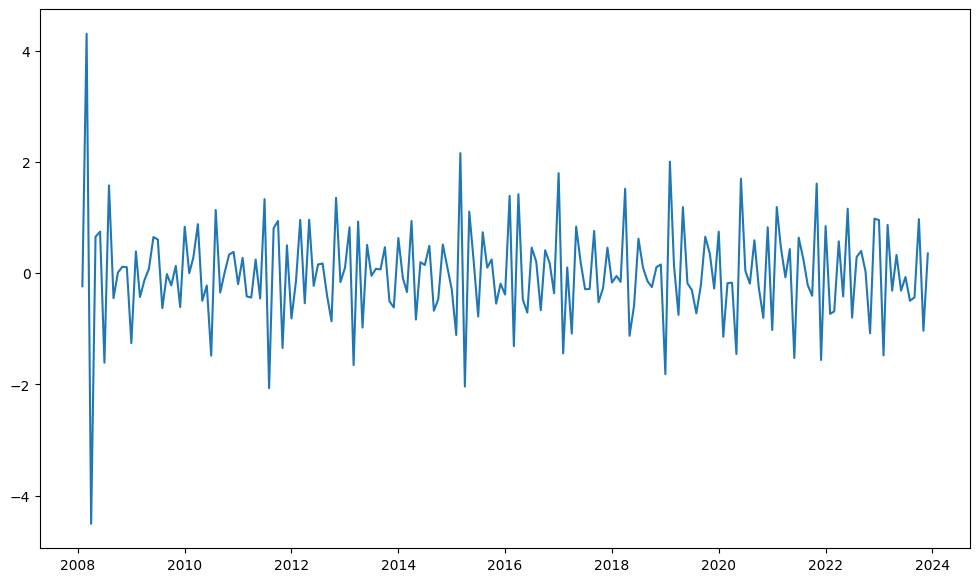

In [32]:
batteries['import_in_tonnd12d1'] = batteries['import_in_tonnd1'].diff(12)            # Seasonal differencing periods = 12
batteriesd12 = batteries.drop(batteries.index[0:12])              # Remove first observations

plt.figure(figsize=(12,7))
plt.plot(batteriesd12.date,batteriesd12.import_in_tonnd12d1)               # plot series
plt.show();

In [33]:
batteries['diff_o1'] = np.append([np.nan] * 1, np.diff(batteries['import_in_tonn'], n=1))
batteries['diff_o2'] = np.append([np.nan] * 2, np.diff(batteries['import_in_tonn'], n=2))
batteries['diff_o3'] = np.append([np.nan] * 3, np.diff(batteries['import_in_tonn'], n=3))
batteries.head()

,import_in_tonn,date,impact_financial_crisis,impact_preemptive_imports,impact_war_pandemic,impact_recovery,impact_domestic_production,import_in_tonnd1,import_in_tonnd12,import_in_tonnd12d1,diff_o1,diff_o2,diff_o3
0,4.911948,2007-01-01,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4.673176,2007-02-01,0,0,0,0,0.0,-0.238772,NaN,NaN,-0.238772,NaN,NaN
2,0.868113,2007-03-01,0,0,0,0,0.0,-3.805064,NaN,NaN,-3.805064,-3.566291,NaN
3,4.993465,2007-04-01,0,0,0,0,0.0,4.125353,NaN,NaN,4.125353,7.930416,11.496708
4,4.352004,2007-05-01,0,0,0,0,0.0,-0.641461,NaN,NaN,-0.641461,-4.766814,-12.697230


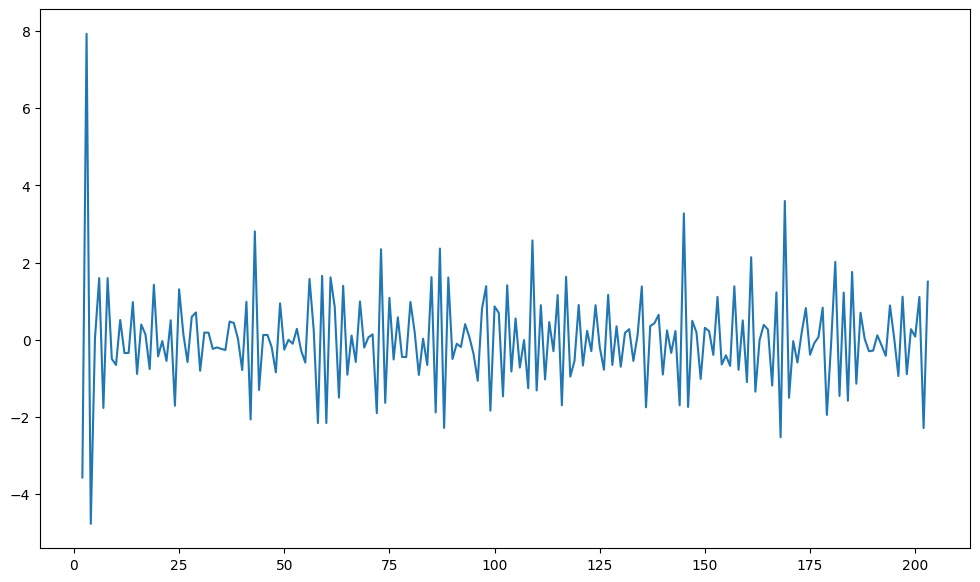

In [34]:
batteriesd_o2 = batteries.drop(batteries.index[0:2])          # Remove first observation
plt.figure(figsize=(12,7))
plt.plot(batteriesd_o2.index,batteriesd_o2.diff_o2)             # plot series
plt.show();


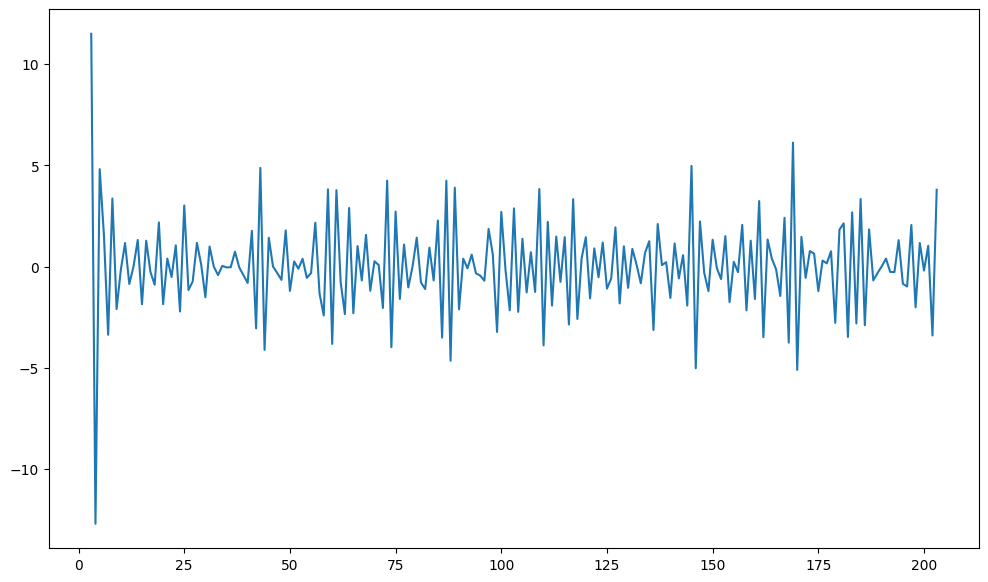

In [35]:
batteriesd_o3 = batteries.drop(batteries.index[0:3])          # Remove first observation
plt.figure(figsize=(12,7))
plt.plot(batteriesd_o3.index,batteriesd_o3.diff_o3)             # plot series
plt.show();

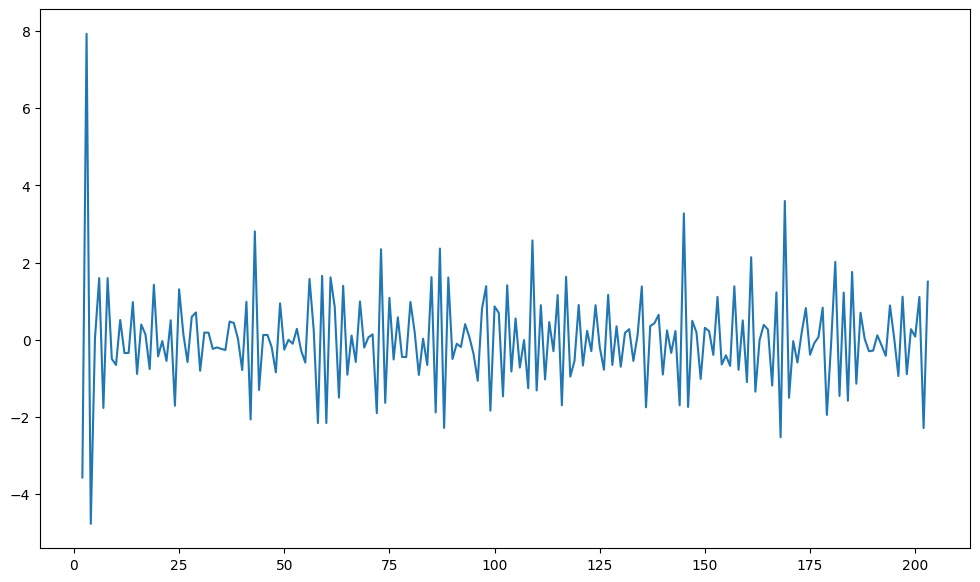

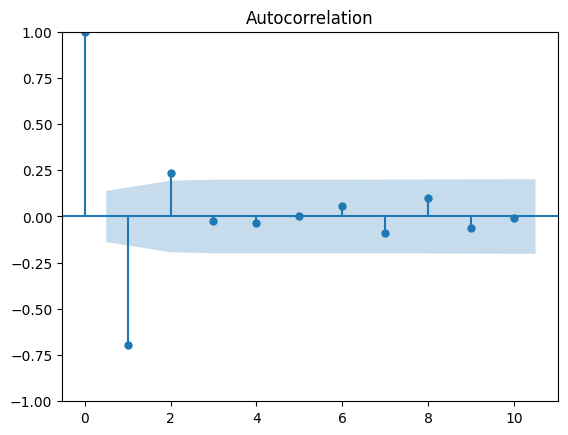

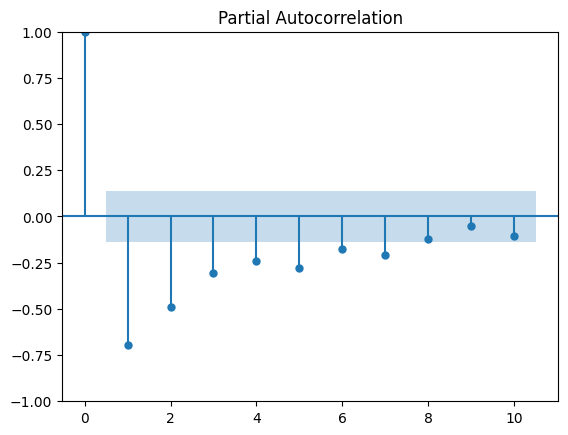

In [36]:
plt.figure(figsize=(12,7))
plt.plot(batteriesd_o2.index,batteriesd_o2.diff_o2)             # plot series
plot_acf(batteriesd_o2.diff_o2, lags=10)      # plot ACF
plot_pacf(batteriesd_o2.diff_o2, lags=10)     # plot PACF
plt.show();
plt.show();

In [37]:
mod = ARIMA(batteriesd_o2['diff_o2'], order=(1,1,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                diff_o2   No. Observations:                  202
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -356.929
Date:                Wed, 08 May 2024   AIC                            717.858
Time:                        22:24:26   BIC                            724.465
Sample:                             0   HQIC                           720.532
                                - 202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8491      0.014    -59.444      0.000      -0.877      -0.821
sigma2         2.0285      0.125     16.172      0.000       1.783       2.274
Ljung-Box (L1) (Q):                  36.93   Jarque-

In [38]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(batteriesd_o2['diff_o2'], order=(1,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                diff_o2   No. Observations:                  202
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -265.984
Date:                Wed, 08 May 2024   AIC                            537.968
Time:                        22:24:26   BIC                            547.893
Sample:                             0   HQIC                           541.984
                                - 202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.041      0.175      0.861      -0.073       0.087
ar.L1         -0.7264      0.031    -23.580      0.000      -0.787      -0.666
sigma2         0.8121      0.045     17.996      0.0

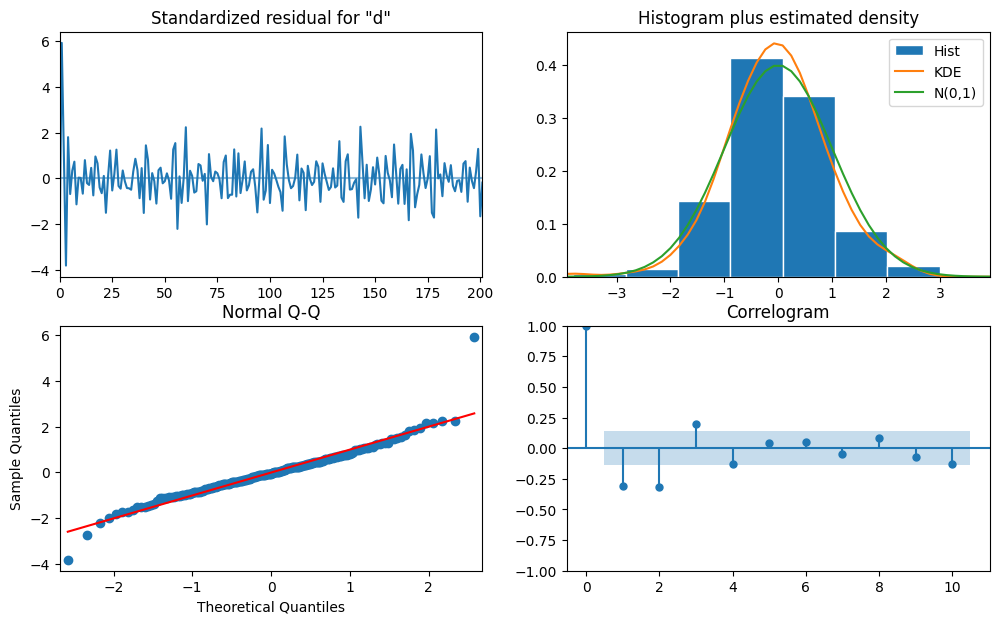

In [39]:
result.plot_diagnostics(figsize=(12,7))
plt.show()

In [40]:
sm.stats.acorr_ljungbox(result.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,62.050915,1.479882e-09


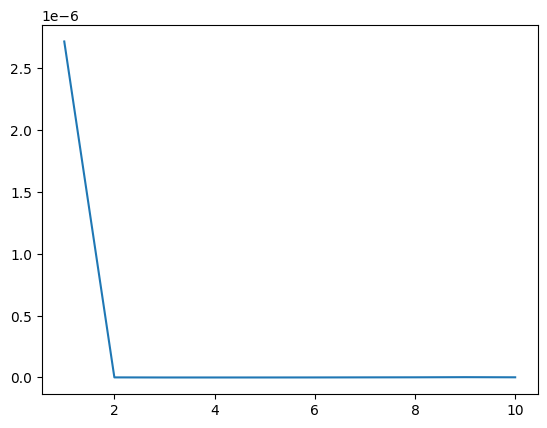

In [41]:
Lj_Box= sm.stats.acorr_ljungbox(result.resid, lags=10,return_df=True)
plt.plot(Lj_Box.index,Lj_Box.lb_pvalue)

In [42]:
stepwise_fit = auto_arima(batteries['import_in_tonn'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=457.996, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=400.799, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=456.007, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=389.210, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=388.882, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=385.176, Time=0.16 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=378.840, Time=0.22 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=377.266, Time=0.29 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=383.449, Time=0.17 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=355.278, Time=0.46 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=354.658, Time=0.59 se

In [43]:
mod = ARIMA(batteries['import_in_tonn'], order=(4,1,2))
result = mod.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:         import_in_tonn   No. Observations:                  204
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -168.367
Date:                Wed, 08 May 2024   AIC                            350.734
Time:                        22:24:39   BIC                            373.926
Sample:                             0   HQIC                           360.117
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8120      0.178      4.557      0.000       0.463       1.161
ar.L2          0.0327      0.077      0.425      0.671      -0.118       0.184
ar.L3         -0.1176      0.106     -1.110      0.2

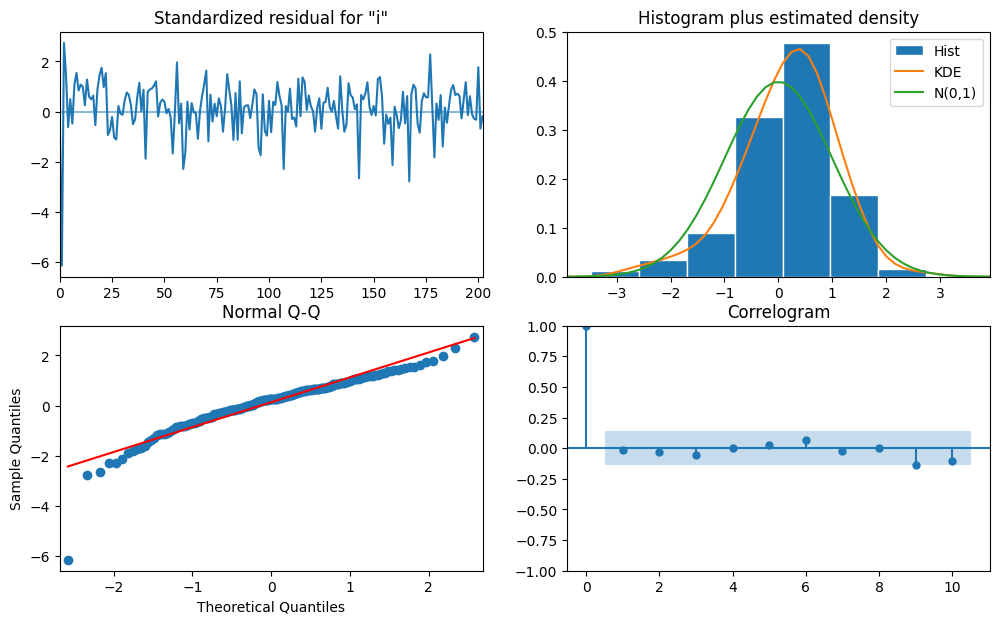

In [44]:
result.plot_diagnostics(figsize=(12,7))
plt.show()

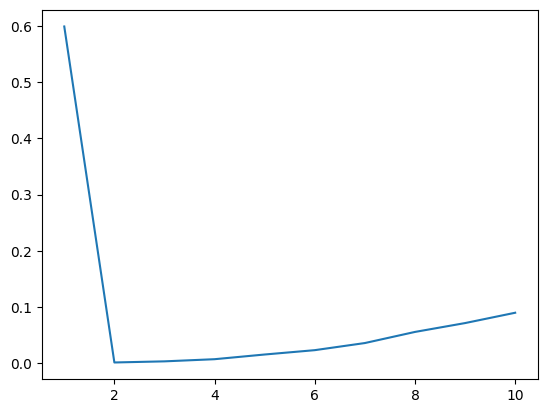

In [45]:
Lj_Box= sm.stats.acorr_ljungbox(result.resid, lags=10,return_df=True)
plt.plot(Lj_Box.index,Lj_Box.lb_pvalue)

In [46]:
sm.stats.acorr_ljungbox(result.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.277005,0.598671
2,12.980403,0.001518
3,13.593808,0.003514
4,13.985878,0.007340
5,13.987916,0.015686
6,14.622019,0.023409
7,14.995555,0.036056
8,15.176328,0.055806
9,15.783375,0.071545
10,16.355260,0.089904


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fa

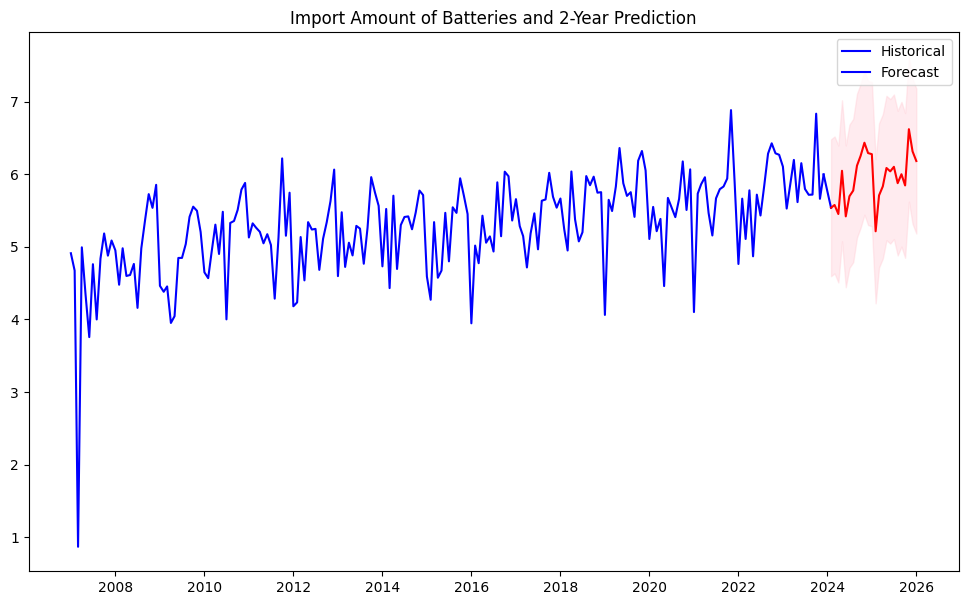

In [47]:
batteries['date'] = pd.to_datetime(batteries['date'])
batteries.set_index('date', inplace=True)

# Selecting exogenous variables
exog_vars = ['impact_financial_crisis', 'impact_preemptive_imports', 'impact_war_pandemic',
             'impact_recovery', 'impact_domestic_production']

# Fit the model using SARIMAX
model = SARIMAX(batteries['import_in_tonn'],
                exog=batteries[exog_vars],
                order=(4, 1, 2),
                seasonal_order=(4, 1, 2, 24))

result = model.fit()

# Forecasting the next 24 months
forecast_steps = 24
exog_forecast = batteries[exog_vars].tail(forecast_steps)  # Adjust exogenous variables as required
forecast = result.get_forecast(steps=forecast_steps, exog=exog_forecast)

# Generating a date range for the forecast
last_date = batteries.index[-1]
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Plotting the results
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Extract the last historical data point
last_historical_value = batteries['import_in_tonn'].iloc[-1]

# Plot historical data
plt.figure(figsize=(12, 7))
plt.plot(batteries.index, batteries['import_in_tonn'], label='Historical', color='blue')

# Connect the last historical point to the first forecast point
plt.plot([last_date, forecast_index[0]], [last_historical_value, forecast_mean.iloc[0]], color='blue')

# Plot the forecast data
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

# Finalize the graph
plt.title("Import Amount of Batteries and 2-Year Prediction")
plt.legend(['Historical', 'Forecast'])
plt.show()
